# This program is for practic and plotting model
## in this program I used make_moons and Logistic Regresstion & Deep Neural Net
### plotted both model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

(1000, 2)

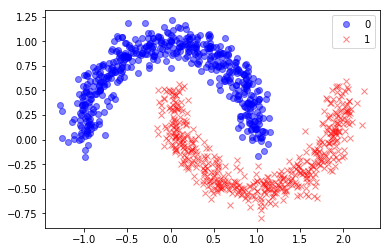

In [40]:
X,y = make_moons(n_samples=1000, noise=0.1)
plt.plot(X[y==0,0],X[y==0,1],'ob',alpha = 0.5)
plt.plot(X[y==1,0],X[y==1,1],'xr',alpha = 0.5)
plt.legend(['0','1'])
X.shape

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                   random_state = 42)

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [44]:
model = Sequential()
model.add(Dense(1,input_shape=(2,),activation='sigmoid'))
model.compile(Adam(0.01),'binary_crossentropy',metrics=['accuracy'])

In [55]:
model.fit(X_train,y_train,epochs=10, verbose=1)

Epoch 1/10
700/700 [==============================] - 0s 53us/step - loss: 0.2613 - acc: 0.8829
Epoch 2/10
700/700 [==============================] - 0s 47us/step - loss: 0.2614 - acc: 0.8829
Epoch 3/10
700/700 [==============================] - 0s 51us/step - loss: 0.2611 - acc: 0.8829
Epoch 4/10
700/700 [==============================] - 0s 39us/step - loss: 0.2611 - acc: 0.8829
Epoch 5/10
700/700 [==============================] - 0s 51us/step - loss: 0.2612 - acc: 0.8814
Epoch 6/10
700/700 [==============================] - 0s 43us/step - loss: 0.2616 - acc: 0.8814
Epoch 7/10
700/700 [==============================] - 0s 40us/step - loss: 0.2612 - acc: 0.8829
Epoch 8/10
700/700 [==============================] - 0s 53us/step - loss: 0.2612 - acc: 0.8814
Epoch 9/10
700/700 [==============================] - 0s 44us/step - loss: 0.2611 - acc: 0.8829
Epoch 10/10
700/700 [==============================] - 0s 44us/step - loss: 0.2613 - acc: 0.8814


In [64]:
result = model.evaluate(X_test,y_test,verbose=1)

300/300 [==============================] - 0s 33us/step


In [65]:
print("the accuracy is {:0.3f}".format(result[1]))

the accuracy is 0.913


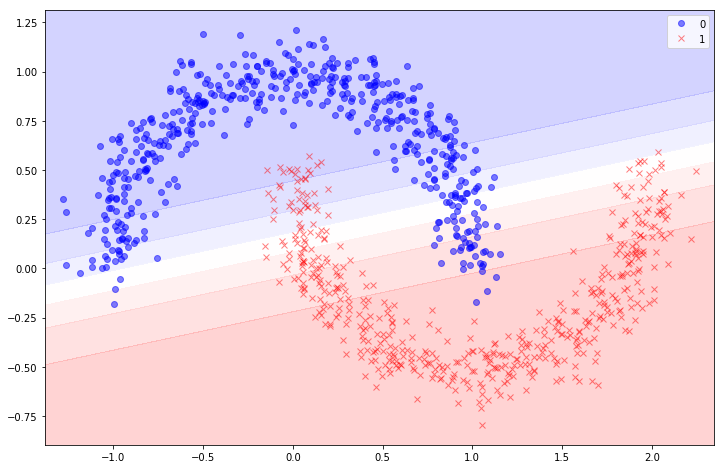

In [67]:
def plot_decision_boundary(model,X,y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb. ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    plt.figure(figsize=(12,8))
    plt.contourf(aa,bb,cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0,0],X[y==0,1],'ob',alpha = 0.5)
    plt.plot(X[y==1,0],X[y==1,1],'xr',alpha = 0.5)
    plt.legend(['0','1'])

plot_decision_boundary(model,X,y)

In [77]:
deep_model = Sequential()
deep_model.add(Dense(4, input_shape=(2,), activation='tanh'))
deep_model.add(Dense(3,activation='tanh'))
deep_model.add(Dense(1,activation='sigmoid'))
deep_model.compile(Adam(0.01), 'binary_crossentropy', metrics=['accuracy'])

In [86]:
deep_model.fit(X_train,y_train,epochs=100,verbose=0)

In [87]:
deep_model.evaluate(X_test,y_test,verbose=1)

300/300 [==============================] - 0s 40us/step


[0.0012688865384067563, 1.0]

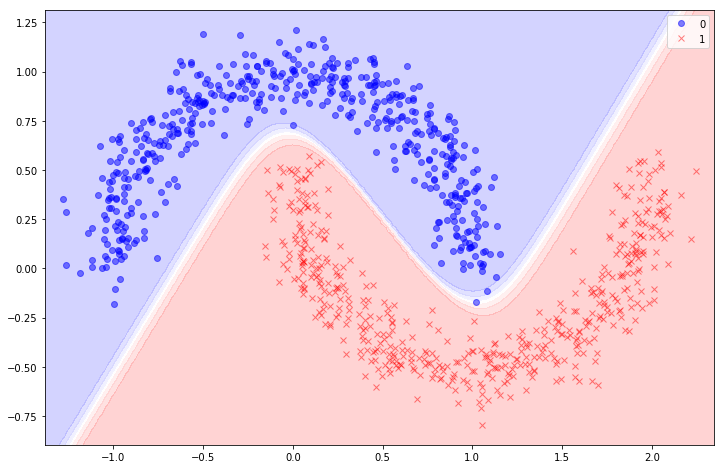

In [88]:
plot_decision_boundary(deep_model,X,y)